# From Interview to Active Persona Analysis
*Created on 2018/07/26   Summer*  
*Updated on 2018/08/01*

---
## Some Explanations

- Since the average time from interview to sign contract recently is 3 days(from previous analysis, and by asking TA), so the data are based on interview date, which is 3 days from today (June 31).
- All data are extracted from superset, from June 22 2018, the day we have talent_event table in naboo.
- Open to any suggestions


## Workflow
1. Assumptions and oberservations.
2. Wrangle, prepare, cleanse the data.
3. Analyze, identify patterns, and explore the data.
4. Model, predict and solve the problem.
5. Visualize, report, and present the problem solving steps and final solution.



In [474]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Acquire data

In [475]:
combine = pd.read_csv('/Users/yuwei/Desktop/LoopApps/python code/Persona Analysis/analysis0731.csv')
combine = combine.replace('UNKNOWN', np.nan)

np.random.seed(1234)
chosen_idx = np.random.choice(len(combine), replace=False, size=round(len(combine)*0.8))
mask = np.array([(i in chosen_idx) for i in range(len(combine))])

train_df = combine[mask]
test_df = combine[~mask]
len(train_df),len(test_df)
#---- WHAT'S THE DIF BETWEEN LEN AND SHAPE


(821, 205)

## Analyze by describing data

**Which features are available in the dataset?**


In [476]:
print(train_df.columns.values)

['user_id' 'social_media_followers_count' 'social_follower_cat'
 'talent_categories' 'status' 'manager_id' 'interviewed_date'
 'signed_date' 'int_sign_duration' 'active' 'source' 'sent'
 'inserted_date_pst' 'age' 'age_group' 'state' 'country' 'gender'
 'followers_count' 'video_int_dur' 'firework_follower_cat' 'time_zone'
 'lat' 'long' 'potential' 'categories_count' 'first_category'
 'second_category' 'third_category' 'fourth_category' 'fifth_category']


**Which features are categorical?**

- *Categorical*: 'sent', 'active' and 'gender'.    

- *Ordinal*: 'ta_name', 'first_category', 'second_category', 'third_category', 'fourth_category' 'fifth_category', 'status', 'age_group', 'country', 'state', 'inserted_date_pst' , 'source', 'social_follower_cat', 'firework_follower_cat' and 'categories_count'

        
**Which features are numerical?**

- *Continous*: 'social_media_followers_count', 'followers_count', 'age', 'lat' and 'long'

In [477]:
# preview the data
train_df.tail()

,user_id,social_media_followers_count,social_follower_cat,talent_categories,status,manager_id,interviewed_date,signed_date,int_sign_duration,active,...,time_zone,lat,long,potential,categories_count,first_category,second_category,third_category,fourth_category,fifth_category
1021,196488,1200.0,1000-3000,"[""comedy""]",active_talent,47.0,6/28/18,7/1/18,3.0,1,...,America/New_York,27.4373,-82.5775,0,1.0,comedy,NaN,NaN,NaN,NaN
1022,151386,81800.0,>20000,"[""performance""]",active_talent,47.0,5/24/18,6/1/18,8.0,1,...,America/Los_Angeles,34.0995,-117.5808,0,1.0,performance,NaN,NaN,NaN,NaN
1023,9765,2095.0,1000-3000,"[""fashion""]",active_talent,47.0,6/4/18,7/4/18,30.0,1,...,Europe/Rome,43.1479,12.1097,0,1.0,fashion,NaN,NaN,NaN,NaN
1024,293446,10727.0,10000-20000,"[""performance""]",active_talent,223391.0,7/4/18,7/30/18,26.0,1,...,America/Chicago,29.9156,-95.6491,0,1.0,performance,NaN,NaN,NaN,NaN
1025,297055,316000.0,>20000,"[""sport""]",active_talent,33156.0,7/26/18,7/27/18,1.0,1,...,America/Los_Angeles,47.5420,-122.3123,0,1.0,sport,NaN,NaN,NaN,NaN


**Which features contain blank, null or empty values?**


In [478]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 1025
Data columns (total 31 columns):
user_id                         821 non-null int64
social_media_followers_count    811 non-null float64
social_follower_cat             811 non-null object
talent_categories               760 non-null object
status                          818 non-null object
manager_id                      818 non-null float64
interviewed_date                821 non-null object
signed_date                     468 non-null object
int_sign_duration               468 non-null float64
active                          821 non-null int64
source                          821 non-null object
sent                            821 non-null int64
inserted_date_pst               819 non-null object
age                             750 non-null float64
age_group                       750 non-null object
state                           654 non-null object
country                         819 non-null object
gender   

**What is the distribution of numerical feature values across the samples?**  
***And some interesting findings***

- **Total samples** are 821.
- **Sent** is a categorical feature with 0 or 1 values. 1 means contract sent.
- **Active** is a categorical feature with 0 or 1 values.
- From those we interviewed from June 22, around 58.5% become active(including potentials).
- If we seperate **potential or not**, cvr for potential become active is 55%(calculated below), cvr of normal ppl we scripted become active is 66%. Is that because we haven't assgin them to TA?
- Ppl's **number of social media follower** varies a lot, median is around 4300.
- Ppl's **number of firework follower** also varies a lot, median is 9, but max is around 5300, which **varies** a lot
- Most of them have 1 **category**.
- Average **age** of ppl we interviewed is 25. 
- Median **duration from interview to sign contract** is 6, but recently we improved a lot.
- Median **upload first video to interview** is 0, which means half ppl upload video before taking interview, or ppl upload video immediately after interview.
- Currently, from ppl we interviewed, 2% comes from potential.

In [479]:
train_df.describe()


,user_id,social_media_followers_count,manager_id,int_sign_duration,active,sent,age,followers_count,video_int_dur,lat,long,potential,categories_count
count,821.000000,8.110000e+02,818.000000,468.000000,821.000000,821.000000,750.000000,819.000000,743.000000,566.000000,566.000000,821.000000,760.000000
mean,229507.794153,3.901451e+06,82774.836186,8.482906,0.568819,0.751523,26.165333,66.157509,-1.185734,35.992092,-88.067029,0.021924,1.092105
std,70661.966438,1.102167e+08,95636.446301,11.319845,0.495543,0.432394,7.754020,375.432922,9.597167,10.530598,39.841109,0.146526,0.396880
min,900.000000,1.600000e+01,47.000000,-16.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,-33.918500,-158.173000,0.000000,1.000000
25%,223680.000000,1.591000e+03,2536.000000,4.000000,0.000000,1.000000,21.000000,2.000000,-1.000000,33.978300,-118.148600,0.000000,1.000000
50%,251174.000000,4.306000e+03,33156.000000,6.000000,1.000000,1.000000,25.000000,9.000000,0.000000,36.131100,-90.083450,0.000000,1.000000
75%,273104.000000,1.500000e+04,222515.000000,9.000000,1.000000,1.000000,30.000000,28.000000,2.000000,40.712100,-75.063900,0.000000,1.000000
max,299178.000000,3.138786e+09,245925.000000,109.000000,1.000000,1.000000,102.000000,5253.000000,67.000000,60.393000,151.198200,1.000000,5.000000


**What is the distribution of categorical features in train group?**

- There are 8 **categories**, 201+20+6+4+1=232 have "lifestyle" category.
- **Gender** variable as two possible values with 56% female (top=female, freq=440/count=788).
- There are 8 **status**, almost 58% became active talent.
- 90% of ppl put their instagram url, which is defined as **source**. Now we have 5 sources: instagram, facebook, musically, youtube and others.
- 5 **age groups**, 42% 18-24 years old (freq=314/count=747).
- Almost 90% from USA, 37% from America/Los_Angeles time zone.
- 6 **social media followers categories**, most ppl's followers are in 1000-3000 group.
- **categories_count**, number of categories they belong to. 
- 5 **firework followers categories**, most of ppl's (70%) followers are less than 20.
- **country**, majority of them are from US, almost 90%.
- **state**, majority of them are from California, almost 37%.


In [480]:
train_df.describe(include=['O'])


,social_follower_cat,talent_categories,status,interviewed_date,signed_date,source,inserted_date_pst,age_group,state,country,gender,firework_follower_cat,time_zone,first_category,second_category,third_category,fourth_category,fifth_category
count,811,760,818,821,468,821,819,750,654,819,795,819,800,760,49,15,5,1
unique,6,34,8,77,71,5,97,5,88,34,2,5,52,8,5,4,2,1
top,1000-3000,"[""performance""]",active_talent,7/11/18,7/27/18,instagram,7/9/18,18-24,California,US,female,<20,America/Los_Angeles,performance,lifestyle,lifestyle,lifestyle,lifestyle
freq,218,201,467,39,27,776,37,329,218,735,435,571,289,209,23,8,4,1


In [481]:
# get a sense of the numbers across the two classes.
train_df.groupby('active').mean()

,user_id,social_media_followers_count,manager_id,int_sign_duration,sent,age,followers_count,video_int_dur,lat,long,potential,categories_count
active,,,,,,,,,,,,
0,242920.720339,9.061315e+06,76565.721591,7.846154,0.706215,26.310345,13.861190,-0.298561,36.173449,-90.123180,0.022599,1.078370
1,219340.394004,2.319361e+04,87464.982833,8.501099,0.785867,26.058005,105.772532,-1.716129,35.863333,-86.607224,0.021413,1.102041


In [482]:
train_df.groupby('potential').mean()

,user_id,social_media_followers_count,manager_id,int_sign_duration,active,sent,age,followers_count,video_int_dur,lat,long,categories_count
potential,,,,,,,,,,,,
0,230366.153176,3.979376e+06,83397.821250,8.597374,0.569116,0.748443,26.098226,65.410737,-0.813793,36.039026,-88.621183,1.087483
1,191215.444444,2.952975e+04,55086.611111,3.727273,0.555556,0.888889,29.058824,99.388889,-16.166667,33.995569,-64.494162,1.294118


In [483]:
#train_df.groupby('age').mean()
#-----how do we define age_group ??? (discuess with Edwin)

In [484]:
#CVR for each age group
train_df.groupby('age_group').mean()


,user_id,social_media_followers_count,manager_id,int_sign_duration,active,sent,age,followers_count,video_int_dur,lat,long,potential,categories_count
age_group,,,,,,,,,,,,,
0-12,238619.454545,7.517945e+04,58453.909091,7.125000,0.636364,0.909091,7.272727,47.000000,-1.800000,21.606830,-43.628220,0.000000,1.454545
13-17,190902.254902,1.385141e+04,58802.607843,11.837838,0.764706,0.647059,16.862745,333.686275,-2.437500,37.268348,-81.207577,0.000000,1.060000
18-24,226353.778116,2.029229e+04,76153.960123,8.743455,0.580547,0.732523,22.167173,44.346505,-0.750831,35.832897,-83.851273,0.021277,1.110749
25-34,239044.137457,1.094849e+07,89178.364261,7.787097,0.522337,0.769759,29.381443,36.749141,-1.062257,36.022311,-95.606287,0.020619,1.086792
35+,234241.132353,1.960825e+04,105893.955882,8.186047,0.617647,0.852941,41.779412,52.602941,-1.492308,38.211948,-88.156877,0.058824,1.049180


## Analyze categorical variables


###  First check our target, active or not

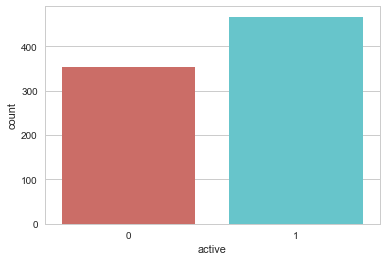

<Figure size 432x288 with 0 Axes>

In [485]:
sns.countplot(x='active', data= train_df, palette = 'hls',)
plt.show()
plt.savefig('count_active_plot')

### Gender 
**Observations 1**

The number of female is 10% more than male, which means are now targeting more on women. Does it mean female receive more contract than man, or what gender should we target more in the future?


In [486]:
train_df[['gender', 'active']].groupby(['gender'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr_active'})

,gender,cvr_active
0,female,0.570115
1,male,0.563889


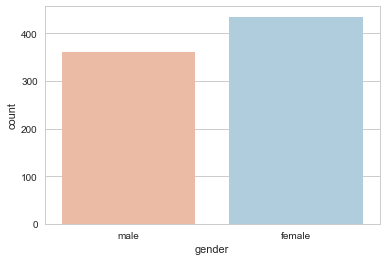

<Figure size 432x288 with 0 Axes>

In [487]:
sns.countplot(x='gender', data= train_df, palette = 'RdBu',)
plt.show()
plt.savefig('gender_plot')


**Suggestions 1**   

Although the number of female is 10% more than male, cvr of male is **3% more** likely to receive contract.


In [488]:
train_df[['source', 'active']].groupby(['source'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr_active'})

,source,cvr_active
2,musicaly,0.800000
3,other,0.625000
1,instagram,0.573454
4,youtube,0.428571
0,facebook,0.250000


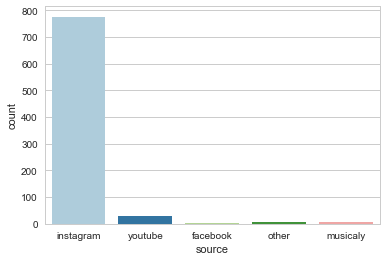

<Figure size 432x288 with 0 Axes>

In [489]:
sns.countplot(x='source', data= train_df, palette = 'Paired',)
plt.show()
plt.savefig('gender_plot')


### Script Source 
**Assumptions 2.1** 

From the table above, we make assumption that ppl from musicaly and instagram are more likely to receive contract

**Observations 2.1** 
 
Remember that according to previous data, we find 90% of ppl are from instagram.
However, there is not enough ppl from misucaly. Let's dig more into the numbers and percentage sent contract.



In [490]:
sc = train_df[['source','active']].groupby(['source']).agg(['sum', 'count']).rename(columns={'count':'num_ttl','sum':'num_active'})
sc['cvr_active'] = round(sc.iloc[:,0]/sc.iloc[:,1],2)
sc

active         cvr_active
          num_active num_ttl           
source                                 
facebook           1       4       0.25
instagram        445     776       0.57
musicaly           4       5       0.80
other              5       8       0.62
youtube           12      28       0.43

**Suggestions 2**

Among 496 active talents, 451 are from instagram, 4 from musicaly.
Sample from musicaly is too small, but I would suggest we try script more on Musicaly, and keep scripting instagram. 

In [491]:
train_df[['age_group', 'active']].groupby(['age_group'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr_active'})

,age_group,cvr_active
1,13-17,0.764706
0,0-12,0.636364
4,35+,0.617647
2,18-24,0.580547
3,25-34,0.522337


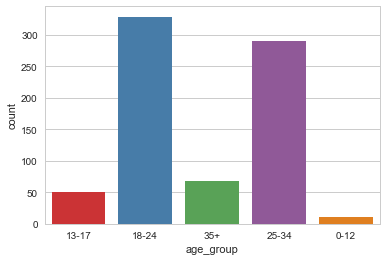

<Figure size 432x288 with 0 Axes>

In [492]:
sns.countplot(x='age_group', data= train_df, palette = 'Set1',)
plt.show()
plt.savefig('gender_plot')

### Age Group 
**Assumptions 3.1** 

From the table above, we make assumption that ppl in age group 13-17, 35+ are more likely to receive contract. 
Although whether they want to sign contract or not is another story, it looks like we should target more on ppl in age group 13-17 and 35+

**Observations 3.1** 
 
CVR ranking: '13-17' > '35+' > '18-24' > '0-12' > '25-34' .  
Remember that according to previous data, we find 350/790= 44% of ppl are from age group 18-24, but actually their cvr from interview to active is not Top 1, much lower than younger ppl.  
Since there is not enough ppl from 0-12 and 35+. Let's dig more into the numbers and compare with percentage sent contract.


In [493]:
ag = train_df[['age_group','active']].groupby(['age_group'], as_index=False).agg(['sum', 'count']).rename(columns={'count':'num_ttl','sum':'cvr_active'})
ag['cvr_active'] = round(ag.iloc[:,0]/ag.iloc[:,1],4)
ag

active         cvr_active
          cvr_active num_ttl           
age_group                              
0-12               7      11     0.6364
13-17             39      51     0.7647
18-24            191     329     0.5805
25-34            152     291     0.5223
35+               42      68     0.6176

**Suggestions 3**

CVR ranking: '13-17' > '0-12' > '18-24'> '35+' > '25-34'.  
num_active ranking: '18-24' > '25-34' > '13-17' >'35+' > '0-12'.  

Now, we targeted more on ppl from 18 to 24, and they do perform very well. We should keep interviewing ppl 18-24, and I would also suggest we give older ppl more chances.

In [494]:
cy_cvr = train_df[['country', 'active']].groupby(['country'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr_active'})
cy_cvr

,country,cvr_active
0,AU,1.000000
30,UA,1.000000
22,NO,1.000000
16,IT,1.000000
15,IQ,1.000000
24,PE,1.000000
29,SK,1.000000
9,ES,1.000000
6,CO,1.000000
32,VN,1.000000


### Country or Region
**Observations 4.1**   
Ppl from IT:Italy , ES:Spain, VN:Vietnam, UA:Ukraine, SK:Slovakia, PL:Poland, PE:Peru, NO:Norway, KE:Kenya, IQ:Iraq, ZA:South Africa have 100% cvr, that is so amazing! Is that because the sample is too small? Let's compare the cvr with actual number.



In [495]:
cy = train_df[['country','active']].groupby(['country'], as_index=False).sum().sort_values(by='active', ascending=False).rename(columns={'active':'num_active'})
#pd.concat([cy, cy_cvr], axis=1, join='inner', ignore_index=True)
cy = pd.merge(cy,cy_cvr)

#Sample is too small, let's select number send contract greater than 2 (Sample is still very small).
cy = cy.loc[cy['num_active'] > 1]
cy

,country,num_active,cvr_active
0,US,417,0.567347
1,CA,14,0.700000
2,GB,7,0.777778
3,AU,3,1.000000
4,IN,3,0.750000
5,SE,2,0.500000
6,ES,2,1.000000


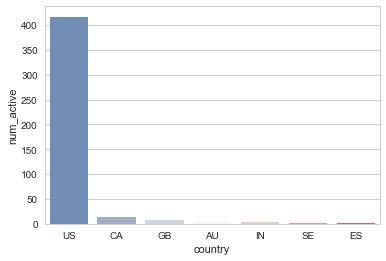

In [496]:
#sns.plot(x='num_active', data= cy, palette = 'Set1',)
#plt.show()
#plt.savefig('country_plot')

sns.barplot(x='country', y='num_active', data = cy, palette="vlag")

#x = np.array(list("ABCDEFGHIJ"))
#y1 = np.arange(1, 11)
#sns.barplot(x=x, y=y1, palette="vlag")



***Suggestions 4.1***  
After deleting samples less than 2, ES: **Spain** still have 100% cvr, followed by IN: **India**, AU:  **Australia**, GB:  **United Kindom**.
  
My suggestion is that when we script based on ppl's location, except for U.S, we increase the volume of ppl from Spain, India, Australia and United Kindom. 
Since the sample is very limited, next step we can try Italy , Spain, Vietnam, Ukraine, Slovakia, Poland, Peru, Norway, Kenya, Iraq, and South Africa.

**Assumptions 4.2**   
Let's zoom in to **U.S** only.   
From our previous experiences, most of our BAs are from California and New York. Do they have better performance than ppl from other areas? What about their cvr and active distribution?

In [497]:
rg_cvr = train_df[['state', 'active']].groupby(['state'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'active_cvr'})
rg_cvr

rg = train_df[['state','active']].groupby(['state'], as_index=False).sum().rename(columns={'active':'num_active'})
rg = pd.merge(rg,rg_cvr).sort_values(by='active_cvr', ascending=False)

#Sample is too small, let's select number send contract greater than 10.
rg = rg.loc[rg['num_active'] > 10]
rg

,state,num_active,active_cvr
23,Florida,24,0.827586
30,Illinois,16,0.727273
24,Georgia,11,0.647059
10,California,132,0.605505
63,Pennsylvania,11,0.523810
56,New York,39,0.500000
79,Texas,14,0.466667


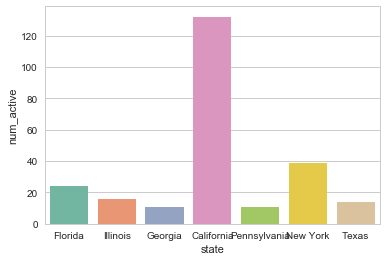

In [498]:
sns.barplot(x='state', y='num_active', data = rg, palette="Set2")

***Suggestions 4.2***   
After deleting samples less than 10, top 3 cvr are from Florida, Illinois and Georgia, and then the two major cities California and New York.
My suggestion is when we script based on location/state, except for CA and NY, increase the volume of ppl from Florida, Illinois and Georgia.

### Category


In [499]:
cat_cvr = train_df[['first_category', 'active']].groupby(['first_category'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'active_cvr'})
cat_cvr

cat = train_df[['first_category','active']].groupby(['first_category'], as_index=False).sum().rename(columns={'active':'num_active'})
cat['pct_catogory'] = round(cat['num_active']/cat['num_active'].sum(),4)

cat = pd.merge(cat,cat_cvr).sort_values(by='active_cvr', ascending=False)
cat['pct_cvr'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cat['active_cvr']], index = cat.index)
cat['pct_active'] = pd.Series(["{0:.2f}%".format(val * 100) for val in cat['pct_catogory']], index = cat.index)
cat = cat.iloc[:,[0,1,5,4]]
cat

,first_category,num_active,pct_active,pct_cvr
0,comedy,59,13.38%,71.08%
5,pet,6,1.36%,60.00%
4,performance,122,27.66%,58.37%
1,dance,21,4.76%,58.33%
3,lifestyle,114,25.85%,57.87%
7,travel,33,7.48%,56.90%
6,sport,21,4.76%,52.50%
2,fashion,65,14.74%,51.18%


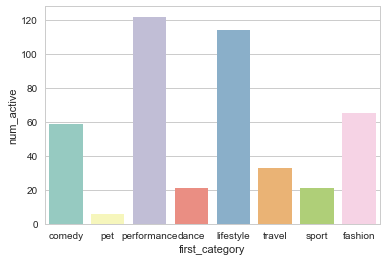

In [500]:
sns.barplot(x='first_category', y='num_active', data = cat, palette="Set3")


**Observations 5.1**    
CVR ranking: Pet > Comedy > Performance   
Num_active ranking: Performance > Lifestyle > Comedy


***Suggestions 5.1***  
My suggestion is when we script based on hashtag, increase the volume of Pet theme, they have the highest cvr.
Also Performance and Comedy is not bad. Keep scripting Comedy and Performance Theme. 

**Assumptions 5.2**    
More focused, which means they have less categories, are more likely to receive contract

### How many categories do they belong to


In [501]:
ct_cvr = train_df[['categories_count', 'active']].groupby(['categories_count'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr'})
ct_cvr

ct = train_df[['categories_count','active']].groupby(['categories_count'], as_index=False).sum().rename(columns={'active':'num_active'})

ct = pd.merge(ct,ct_cvr).sort_values(by='cvr', ascending=False)
ct['active_cvr'] = pd.Series(["{0:.2f}%".format(val * 100) for val in ct['cvr']], index = ct.index)
#Sample is too small, let's select number send contract greater than 20.
#ct.loc[ct['num_sent'] > 20]
ct = ct.iloc[:,[0,1,3]]
ct

,categories_count,num_active,active_cvr
4,5.0,1,100.00%
2,3.0,8,80.00%
0,1.0,411,57.81%
1,2.0,19,55.88%
3,4.0,2,50.00%


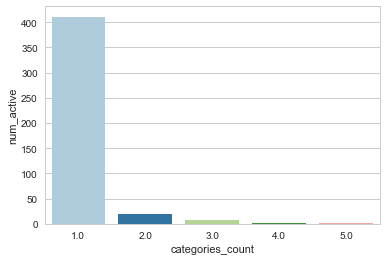

In [502]:
sns.barplot(x='categories_count', y='num_active', data = ct, palette="Paired")

***Suggestions 5.2***   
More diversified, higher cvr. But sample size is very small, it's still hard to tell. 
No suggestion here.

## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Let us start from looking at the most updated **Location of BA**


In [503]:
plotly.tools.set_credentials_file(username='summerxia', api_key='mPpSzFBTrmzhSEsABwrJ')

filtered_data = train_df[(train_df['lat'].notnull())
                          & (train_df['long'].notnull())]
lat_vals = filtered_data['lat'].tolist()
long_vals = filtered_data['long'].tolist()
active_vals = filtered_data['active'].tolist()

# inactive : black
#color_vals = list(map(lambda x: 0.7 if x == 1 else 0, active_vals))
# inactive : blue
#color_vals = list(map(lambda x: 0.7 if x == 1 else 0.2, active_vals))
# inactive : grey
color_vals = list(map(lambda x: 0.7 if x == 1 else 0.5, active_vals))

data = [
    go.Scattermapbox(
        lat=lat_vals,
        lon=long_vals,
        mode='markers',
        marker=dict(
            size=9,
            #color='rgb(255, 0, 0)',
            color=color_vals,
            colorscale=[[0, 'rgb(0,0,0)'],
                        [0.2, 'rgb(0, 0, 255)'],
                        [0.5, 'rgb(47, 79, 79)'],
                        [0.7, 'rgb(255, 0, 0)'],
                        [1, 'rgb(255,255,255)']],
            cmax=1,
            cmin=0,
            opacity=0.7
        ),
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1Ijoid2luZHNub3ciLCJhIjoiY2prM25xd3dtMDhweTN2bWVidGVpeGFwZCJ9.MiHqwxivv3xMmSerNUtWHg',
        bearing=0,
        center=dict(
            lat=40.7410135,
            lon=-73.9897234
        ),
        pitch=0,
        zoom=10,
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='User locations')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~summerxia/0 or inside your plot.ly account where it is named 'User locations'


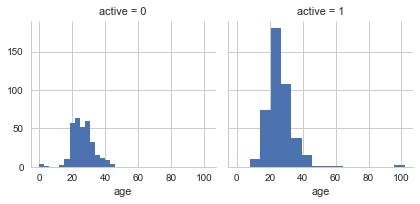

In [504]:
g = sns.FacetGrid(train_df, col = 'active')
g.map(plt.hist, 'age', bins = 15)



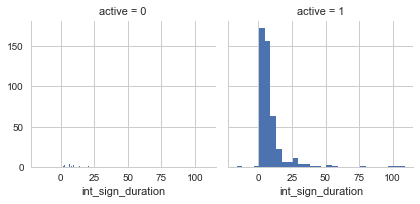

In [505]:
sd = sns.FacetGrid(train_df, col = 'active')
sd.map(plt.hist, 'int_sign_duration', bins =30)

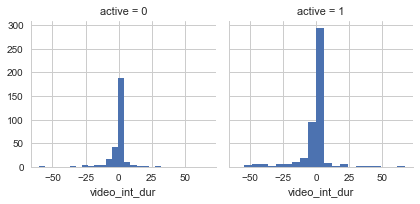

In [506]:
sd = sns.FacetGrid(train_df, col = 'active')
sd.map(plt.hist, 'video_int_dur', bins =20)

## Heatmap,  correlation between features?

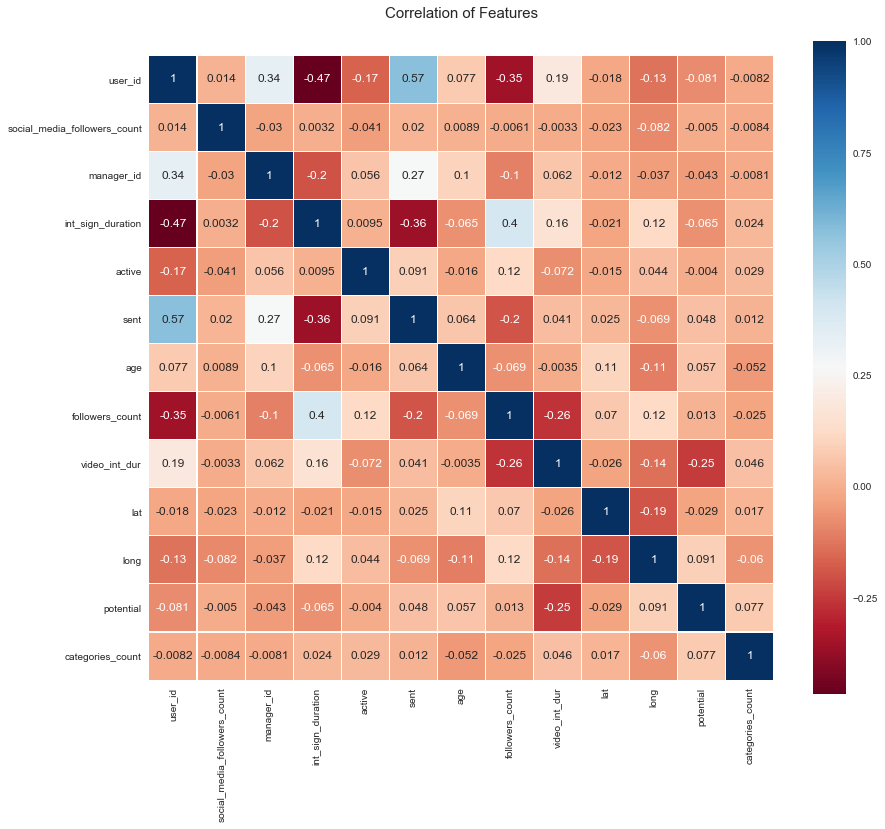

In [507]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

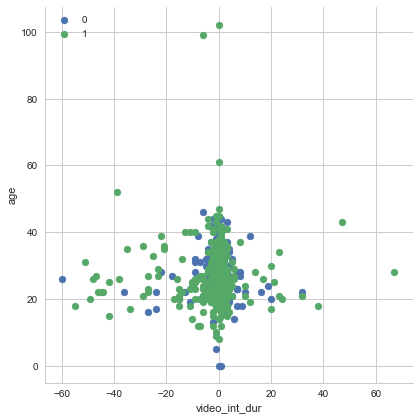

In [508]:
#Plot with respect to video-int duration, age

sepalPlt = sns.FacetGrid(train_df, hue="active", size=6).map(plt.scatter, "video_int_dur", "age")
plt.legend(loc='upper left');


In [509]:
#Zoom in, trying to find group, but..

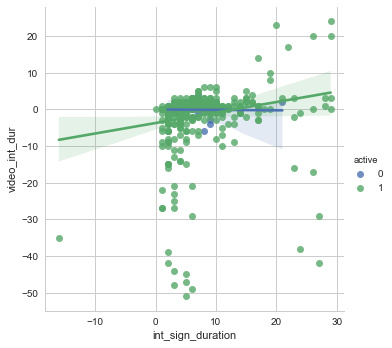

In [510]:
g = sns.lmplot(x="int_sign_duration", y="video_int_dur", hue="active",
               truncate=True, data=train_df.loc[train_df['int_sign_duration']<30])


### Converting a categorical feature and analyze

Now we can convert features which contain strings to numerical values.  
Let us start by converting Gender feature to a new feature where female=1 and male=0

In [511]:

#train_df['gender'] = train_df['gender'].dropna().map( {'female': 1, 'male': 0} ).astype(int)

#for dataset in combine:
#    dataset['gender'] = dataset['gender'].map( {'female': 1, 'male': 0} ).astype(int)

#train_df.head()

combine['gender'].replace('female',1,inplace=True)
combine['gender'].replace('male',0,inplace=True)
train_df.shape

(821, 31)

In [512]:
combine['age_group'].replace('0-12',0, inplace=True)
combine['age_group'].replace('13-17',1, inplace=True)
combine['age_group'].replace('18-24',2, inplace=True)
combine['age_group'].replace('25-34',3, inplace=True)
combine['age_group'].replace('35+',4, inplace=True)


combine['social_follower_cat'].replace('<1000',0, inplace = True)
combine['social_follower_cat'].replace('1000-3000',1, inplace = True)
combine['social_follower_cat'].replace('3000-6000',2, inplace = True)
combine['social_follower_cat'].replace('6000-10000',3, inplace = True)
combine['social_follower_cat'].replace('10000-20000',4, inplace = True)
combine['social_follower_cat'].replace('>20000',5, inplace = True)


combine['firework_follower_cat'].replace('<20',0, inplace = True)
combine['firework_follower_cat'].replace('20-60',1, inplace = True)
combine['firework_follower_cat'].replace('60-120',2, inplace = True)
combine['firework_follower_cat'].replace('120-200',3, inplace = True)
combine['firework_follower_cat'].replace('>200',4, inplace = True)


combine['source'].replace('instagram',0, inplace = True)
combine['source'].replace('youtube',1, inplace = True)
combine['source'].replace('facebook',2, inplace = True)
combine['source'].replace('musicaly',3, inplace = True)
combine['source'].replace('other',4, inplace = True)

train_df = combine[mask]
test_df = combine[~mask]
len(combine)

1026

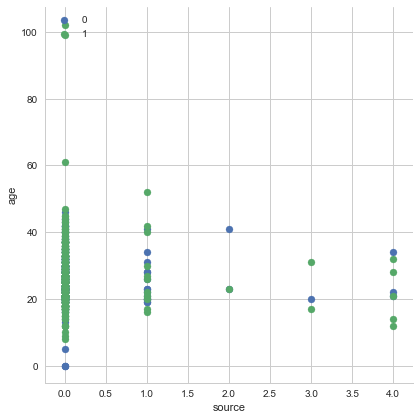

In [513]:
#combine['social_follower_cat']

#Plot with respect to age_group, social_follower_cat, firework_follower_cat, source
# TRY HERE!!
sepalPlt = sns.FacetGrid(train_df, hue="active", size=6).map(plt.scatter, "source", "age")
plt.legend(loc='upper left');

## Social Media Followers

In [514]:
sfc_cvr = train_df[['social_follower_cat', 'active']].groupby(['social_follower_cat'], as_index=False).mean().sort_values(by='active', ascending=False).rename(columns={'active':'cvr'})
sfc_cvr

sfc = train_df[['social_follower_cat','active']].groupby(['social_follower_cat'], as_index=False).sum().rename(columns={'active':'num_active'})

sfc = pd.merge(sfc,sfc_cvr).sort_values(by='cvr', ascending=False)
sfc['active_cvr'] = pd.Series(["{0:.2f}%".format(val * 100) for val in sfc['cvr']], index = sfc.index)

sfc = sfc.iloc[:,[0,1,3]]
sfc

,social_follower_cat,num_active,active_cvr
0,0.0,68,62.96%
3,3.0,48,60.00%
1,1.0,128,58.72%
2,2.0,81,56.64%
4,4.0,56,55.45%
5,5.0,82,50.93%


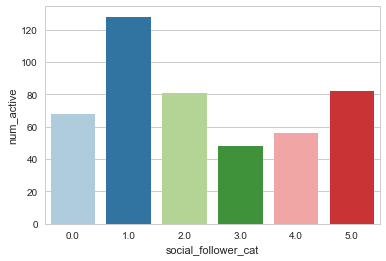

In [515]:
sns.barplot(x='social_follower_cat', y='num_active', data=sfc, palette="Paired")

***Suggestions***  
Social Media Follower number **<1000** has highest cvr, followed by **6000-10000**, **1000-3000**



## Social Media/ Firework followers

In [516]:
combine['social_div_firework'] = combine['social_media_followers_count']/combine['followers_count']
# WORKING ON (sign-interview) duration, social_media_followers/firework_followers

In [517]:

#train_df['social_div_firework']
combine.head()

,user_id,social_media_followers_count,social_follower_cat,talent_categories,status,manager_id,interviewed_date,signed_date,int_sign_duration,active,...,lat,long,potential,categories_count,first_category,second_category,third_category,fourth_category,fifth_category,social_div_firework
0,20957,556.0,0.0,"[""performance""]",active_talent,47.0,4/9/18,5/8/18,29.0,1,...,33.6878,-84.2507,0,1.0,performance,NaN,NaN,NaN,NaN,5.914894
1,229460,11100.0,4.0,NaN,followup,883.0,6/27/18,NaN,NaN,0,...,40.7910,-73.9256,0,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,233142,4259.0,2.0,"[""lifestyle""]",sent_contract,2536.0,6/26/18,NaN,NaN,0,...,40.9731,-73.9615,0,1.0,lifestyle,NaN,NaN,NaN,NaN,inf
3,9222,25500.0,5.0,"[""fashion""]",active_talent,47.0,3/20/18,5/16/18,57.0,1,...,18.5333,73.8667,0,1.0,fashion,NaN,NaN,NaN,NaN,271.276596
4,255779,27000.0,5.0,"[""fashion""]",active_talent,42612.0,7/10/18,7/19/18,9.0,1,...,34.2023,-118.4468,0,1.0,fashion,NaN,NaN,NaN,NaN,9000.000000


## Now Drop 
the user_id, social_media_url and etc feature from datasets. 

In [518]:
combine = combine.drop(['talent_categories','status', 'manager_id', 'interviewed_date','signed_date', 'inserted_date_pst', 'state','country', 'first_category', 'user_id', 'lat','long','second_category','time_zone', 'int_sign_duration','third_category','fourth_category','fifth_category'], axis=1)

In [519]:
train_df = combine[mask]
test_df = combine[~mask]


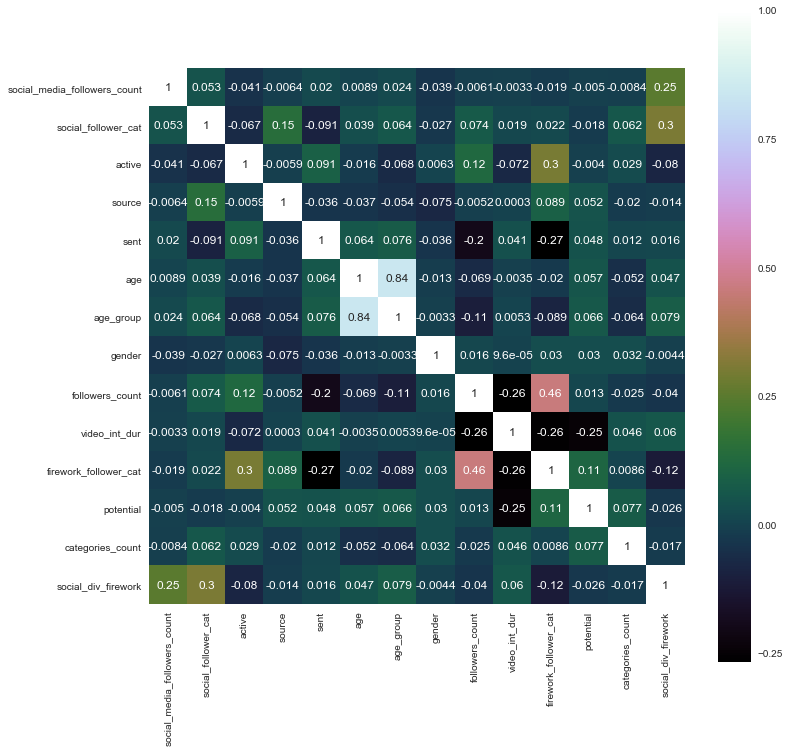

In [520]:

corr = train_df.corr()
corr_mat=train_df.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

1. generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).
2. More accurate way of guessing missing values is to use other correlated features. But from the heatmap, it seems features are all uncorrelated.

---
### working on it !!!

## Fill with missing value with median value

In [521]:
train_df['social_media_followers_count'].fillna(train_df['social_media_followers_count'].dropna().median(), inplace=True)
train_df['social_follower_cat'].fillna(train_df['social_follower_cat'].dropna().median(), inplace=True)
train_df['age'].fillna(train_df['age'].dropna().median(), inplace=True)
train_df['video_int_dur'].fillna(train_df['video_int_dur'].dropna().median(), inplace=True)

train_df['age_group'].fillna(train_df['age_group'].dropna().median(), inplace=True)
train_df['followers_count'].fillna(train_df['followers_count'].dropna().median(), inplace=True)
train_df['firework_follower_cat'].fillna(train_df['firework_follower_cat'].dropna().median(), inplace=True)
train_df['gender'].fillna(train_df['gender'].dropna().median(), inplace=True)
train_df['categories_count'].fillna(train_df['categories_count'].dropna().min(), inplace=True)

train_df = train_df[~train_df.isin([np.inf, -np.inf]).any(1)]
train_df['social_div_firework'].fillna(train_df['social_div_firework'].dropna().median(), inplace=True)

#train_df['social_div_firework'].replace(inf,train_df['social_div_firework'].dropna().median())
train_df['social_div_firework'].replace('inf',train_df['social_div_firework'].dropna().median(),inplace=True)



test_df['social_media_followers_count'].fillna(test_df['social_media_followers_count'].dropna().median(), inplace=True)
test_df['social_follower_cat'].fillna(test_df['social_follower_cat'].dropna().median(), inplace=True)
test_df['age'].fillna(test_df['age'].dropna().median(), inplace=True)
test_df['video_int_dur'].fillna(test_df['video_int_dur'].dropna().median(), inplace=True)
test_df['age_group'].fillna(test_df['age_group'].dropna().median(), inplace=True)
test_df['followers_count'].fillna(test_df['followers_count'].dropna().median(), inplace=True)
test_df['firework_follower_cat'].fillna(test_df['firework_follower_cat'].dropna().median(), inplace=True)
test_df['gender'].fillna(test_df['gender'].dropna().median(), inplace=True)
test_df['categories_count'].fillna(test_df['categories_count'].dropna().min(), inplace=True)

test_df = test_df[~test_df.isin([np.inf, -np.inf]).any(1)]
test_df['social_div_firework'].fillna(test_df['social_div_firework'].dropna().median(), inplace=True)
test_df['social_div_firework'].replace('inf',test_df['social_div_firework'].dropna().median(),inplace=True)

combine = [train_df, test_df]
len(test_df), len(train_df), len(combine)
#test_df


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(172, 708, 2)

In [522]:
pd.set_option('display.max_rows', 1500)
#print(train_df['social_media_followers_count'])

## Split Train and Test Group (X,Y)

In [523]:
# Already DID!
#train_size = round(len(train_df)*0.8,0)
#test_size = len(train_df)-train_size
#train_group = train_df[1:609]
#test_group = train_df[610:718]
X_train = train_df.drop("active", axis=1)
Y_train = train_df["active"]
X_test  = test_df.drop("active", axis=1).copy()
Y_test = test_df["active"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((708, 13), (708,), (172, 13), (172,))

### Normalization
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [524]:
# Normalize feature set
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler().fit(X_train)
scaled_values = standard_scaler.transform(X_train)
X_train_norm = X_train.copy()
X_train_norm.loc[:,:] = scaled_values

scaled_values = standard_scaler.transform(X_test) 
X_test_norm = X_test.copy()
X_test_norm.loc[:,:] = scaled_values

## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (active or not) with other variables or features (gender, age, followers...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Here, from the heatmap, we can see that variables are independent of each other. That is, the model should have little or no multicollinearity.
However, logistic regression needs large sample size. Here, our sample size is **not large* enough.

In [525]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_norm, Y_train)
#Y_pred = logreg.predict(X_test_norm)
acc_log = round(logreg.score(X_train_norm, Y_train) * 100, 2)
test_log = round(logreg.score(X_test_norm, Y_test) * 100,2)
print(f'Train model coefficient(confidence score) is {acc_log}%.')
print(f'Test model coefficient(confidence score) is {test_log}%.')

Train model coefficient(confidence score) is 65.68%.
Test model coefficient(confidence score) is 71.51%.


In [526]:
coeff_df = pd.DataFrame(train_df.columns.delete(2))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
9,firework_follower_cat,0.822759
7,followers_count,0.232335
3,sent,0.226854
4,age,0.169696
11,categories_count,0.094615
6,gender,0.004042
8,video_int_dur,0.003210
12,social_div_firework,0.001736
1,social_follower_cat,-0.041446
2,source,-0.064697


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [527]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train_norm, Y_train)
#Y_pred = svc.predict(X_test_norm)
acc_svc = round(svc.score(X_test_norm, Y_test) * 100, 2)
acc_svc

69.77

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [528]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_norm, Y_train)
#Y_pred = knn.predict(X_test_norm)
acc_knn = round(knn.score(X_test_norm, Y_test) * 100, 2)
acc_knn

62.79

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [529]:
# Gaussian Naive Bayes
# no need to normalize
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
#Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

43.02

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [530]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_norm, Y_train)
#Y_pred = perceptron.predict(X_test_norm)
acc_perceptron = round(perceptron.score(X_test_norm, Y_test) * 100, 2)
acc_perceptron

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



48.84

In [531]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_norm, Y_train)
#Y_pred = linear_svc.predict(X_test_norm)
acc_linear_svc = round(linear_svc.score(X_test_norm, Y_test) * 100, 2)
acc_linear_svc

72.09

In [532]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_norm, Y_train)
#Y_pred = sgd.predict(X_test_norm)
acc_sgd = round(sgd.score(X_test_norm, Y_test) * 100, 2)
acc_sgd

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



56.98

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [533]:
# Decision Tree
# no need to normalize

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

52.33

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [534]:
# Random Forest
# no need to normalize

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

62.21

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [535]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Linear SVC,72.09
0,Support Vector Machines,69.77
2,Logistic Regression,65.68
1,KNN,62.79
3,Random Forest,62.21
6,Stochastic Gradient Decent,56.98
8,Decision Tree,52.33
5,Perceptron,48.84
4,Naive Bayes,43.02


In [536]:
X_train_norm.columns.values

array(['social_media_followers_count', 'social_follower_cat', 'source',
       'sent', 'age', 'age_group', 'gender', 'followers_count',
       'video_int_dur', 'firework_follower_cat', 'potential',
       'categories_count', 'social_div_firework'], dtype=object)

###  Reduce Feature Set

Reducing the number of features (dimensionality) is important in statistical learning. For many data sets with a large number of features and a limited number of observations, usually many features are not useful for producing a desired learning result and the limited observations may lead the learning algorithm to overfit to the noise. Reducing features can also save storage and computation time and increase comprehensibility.

By reducing feature set, the most important features will be addressed, which are key factors impacting the target value.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Optimal number of features : 4


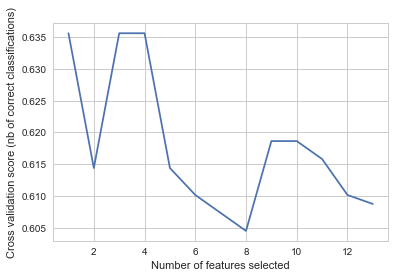

In [537]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
logreg = LogisticRegression()

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train_norm, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [538]:
sel_col = X_train_norm.columns.values[rfecv.ranking_ == 1]
print(sel_col)

['social_media_followers_count' 'sent' 'followers_count'
 'firework_follower_cat']


In [539]:
X_train_norm_less = X_train_norm.loc[:, rfecv.ranking_ == 1]
X_test_norm_less = X_test_norm.loc[:, rfecv.ranking_ == 1]

logreg = LogisticRegression()
logreg.fit(X_train_norm_less, Y_train)
#Y_pred = logreg.predict(X_test_norm_less)
acc_log = round(logreg.score(X_train_norm_less, Y_train) * 100, 2)
test_log = round(logreg.score(X_test_norm_less, Y_test) * 100,2)
print(f'Train model coefficient is {acc_log}%.')
print(f'Test model coefficient is {test_log}%.')

Train model coefficient is 66.1%.
Test model coefficient is 70.35%.


## Conclusion

 #### 1. Target more on Male, they are more likely to become active (3% higher than woman).
 #### 2. Script Musicaly, ppl put musicaly url are more likely to become active (20% higher than instagram).
 #### 3. Target more ppl in age_group 13- 17, 35+, and 18-24. They now have cvr greater than average. 
 #### 4. Except for US, target more on Australia, United Kindom, Sweden, Canada, their cvr are higher than average.
 #### 5. Zoom in to US, except for the two big states CA and NY, target more on ppl from Florida, Illinois and Georgia, they have cv > 65%, perform better than ppl from the big two.
 #### 6. Ppl with "Pet theme" have highest cvr, followed by comedy and performace, dance. I would suggest add more pet theme hashtag.
 #### 7. Category more diversified, higher cvr. But sample size is very small, it's still hard to tell now.
 #### 8. Social media followers between 6k-10k are most likely to sign contract (67%), 7% more than the third cvr group(10k-20k). Second is <1000(66%), but we definitely don't want to target at them.
 #### 9. Among the 9 models, Linear SVC, SVM, Logistic regression, KNN and Random Forest perform well. 
 #### 10. After reducing features to 4, confidence score of Logistic regression model is 70.35%.


 
 
 
 
 
 

## Appendix

### - SQL query
WITH sent AS (
    SELECT *, 1 sent
    FROM user_data
    WHERE user_id IN 
    (SELECT distinct(talent_events.user_id) AS talent_id
    FROM talent_events
    LEFT JOIN user_data statustime ON talent_events.user_id = statustime.user_id
    WHERE props->>'to_status' = 'sent_contract'
    )
),

interviewed AS (
  SELECT user_data.user_id,  social_media_followers_count,
  CASE WHEN  social_media_followers_count<=1000 THEN '<1000'
      WHEN social_media_followers_count>20000 THEN '>20000'
      WHEN social_media_followers_count>10000 THEN '10000-20000'
      WHEN social_media_followers_count>6000 THEN '6000-10000'
      WHEN social_media_followers_count>3000 THEN '3000-6000'
      WHEN social_media_followers_count>1000 THEN '1000-3000'

  END AS social_follower_cat,
  talent_categories, status, manager_id, DATE(interviewed_at) AS interviewed_date,
  DATE(signed_contract_at) AS signed_date, 
  DATE(signed_contract_at) - DATE(interviewed_at) AS int_sign_duration,
  CASE WHEN strpos(status, 'active') > 0 THEN 1
  ELSE 0
  END AS active,
CASE WHEN strpos(social_media_url, 'instagram') > 0 THEN 'instagram'
   WHEN strpos(social_media_url, 'youtube') > 0 THEN 'youtube'
   WHEN strpos(social_media_url, 'musical') > 0 THEN 'musicaly'
   WHEN strpos(social_media_url, 'facebook') > 0 THEN 'facebook'
       ELSE 'other'
       END AS source
  FROM user_data
  WHERE user_data.user_id IN 
    (SELECT distinct(talent_events.user_id) AS talent_id
    FROM talent_events
    LEFT JOIN user_data statustime ON talent_events.user_id = statustime.user_id
    WHERE interviewed_at is not null)
    AND DATE(current_date) - DATE(interviewed_at) **> 2**
),

upload_first AS (
SELECT creator_id, MIN(DATE(inserted_at)) AS video_upload_date
FROM videos
WHERE deleted_at IS NULL
AND creator_id IN (SELECT DISTINCT(talent_events.user_id) AS talent_id
    FROM talent_events
    LEFT JOIN user_data statustime ON talent_events.user_id = statustime.user_id
    WHERE interviewed_at is not null)
GROUP BY creator_id
ORDER BY creator_id
)

SELECT interviewed.*, COALESCE(st.sent, 0 ) AS sent, 
fu.inserted_date_pst, fu.age, fu.age_group, fu.region AS state,
fu.country, fu.gender, fu.followers_count, (uf.video_upload_date - interviewed_date) AS video_int_dur,
CASE WHEN fu.followers_count<=20 THEN '<20'
  WHEN fu.followers_count>200 THEN '>200'
  WHEN fu.followers_count>120 THEN '120-200'
  WHEN fu.followers_count>60 THEN '60-120'
  WHEN fu.followers_count>20 THEN '20-60'
END AS firework_follower_cat,
fu.time_zone, fu.lat, fu.long, COALESCE(potl.potential,0) AS potential,
array_length(interviewed.talent_categories,1) AS categories_count, 
interviewed.talent_categories[1] AS first_category,
interviewed.talent_categories[2] AS second_category,
interviewed.talent_categories[3] AS third_category,
interviewed.talent_categories[4] AS fourth_category,
interviewed.talent_categories[5] AS fifth_category
FROM interviewed
LEFT JOIN upload_first uf ON uf.creator_id = interviewed.user_id
LEFT JOIN sent st ON st.user_id = interviewed.user_id
LEFT JOIN fact_users fu ON fu.id = interviewed.user_id
LEFT JOIN (
  SELECT user_id, 1 potential
  FROM talent_events
  WHERE props ->> 'from_status' = 'potential'
) potl ON potl.user_id = interviewed.user_id
